### Evaluating sequencing results for JPEG experimental run

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import get_fastq_records, reverse_complement, create_fasta_file
from clustering import Clustering
from strand_reconstruction import align
import matplotlib.pyplot as plt
import pandas as pd
from checksum import CheckSum4
import uuid
import os
from tqdm import tqdm
from Levenshtein import distance, ratio
from Bio import Align
import numpy as np

In [3]:
filepath = r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEGDNA\1_Twist 1\1_Twist.fastq"

In [4]:
records = []
records.extend(get_fastq_records(filepath))

113433it [00:03, 29486.24it/s]


In [ ]:
""" For the other data
"""
records = []
for file in tqdm(os.listdir(filepath)):
    records.extend(get_fastq_records(os.path.join(filepath, file)))
    print(len(records))
"""
"""

In [5]:
strand_pool = [str(i.seq) for i in records]
strand_ids = [str(i.id) for i in records]

### Clustering

In [7]:
# Original file
df = pd.read_csv(r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\JPEG\files 2\cat_FFDX_checksum.csv")
original_strands = df['seq'].tolist()

In [8]:
## Removing strand pool primers

def remove_adapters_alignment(strand_pool, strand_ids):
    
    front_adapter = 'CATGAAGTGGAGTAGCGGCG'
    reverse_adapter = 'GCGACCGATGCTCACTGATC'
    #'GCGACCGATGCTCACTGATC'  #GATCAGTGAGCATCGGTCGC

    #front_adapter = 'AATGTACTTCGTTCAGTTACGTATTGCT'  # badread adapters
    #reverse_adapter = 'GCAATACGTAACTGAACGAAGT'

    rev_front = reverse_complement(reverse_adapter)
    rev_back = reverse_complement(front_adapter)

    cleaned_strand_pool = []
    cleaned_strand_ids = []

    for ind, i in tqdm(enumerate(strand_pool), total=len(strand_pool)):

        t1 = align(i[:25], front_adapter)

        t2 = align(i[:25], rev_front)

        if t1.score >= t2.score:  # Forward adapter
            cleaned_strand = i[t1.indices[0][-1]:]
            t1 = align(cleaned_strand[-25:], reverse_adapter)
            cleaned_strand = cleaned_strand[:-25 + t1.indices[0][0]]
            

        else:
            cleaned_strand = i[t2.indices[0][-1]:]
            t2 = align(cleaned_strand[-25:], rev_back)
            cleaned_strand = cleaned_strand[:-25 + t2.indices[0][0]]
            cleaned_strand = reverse_complement(cleaned_strand)

        cleaned_strand_pool.append(cleaned_strand)
        cleaned_strand_ids.append(strand_ids[ind])

    return cleaned_strand_pool, cleaned_strand_ids

In [9]:
from utils import remove_adapters_zero_error

In [10]:
cleaned_strand_pool, cleaned_strand_ids = remove_adapters_alignment(strand_pool, ["" for i in range(len(strand_pool))])

 27%|██▋       | 30705/113433 [00:12<00:34, 2413.43it/s]


KeyboardInterrupt: 

In [22]:
strand_pool = [i for i in strand_pool if len(i) < 260 and len(i) > 210]

In [27]:
front_adapter = 'CATGAAGTGGAGTAGCGGCG'
reverse_adapter = 'GCGACCGATGCTCACTGATC'
#'GCGACCGATGCTCACTGATC'  #GATCAGTGAGCATCGGTCGC

#front_adapter = 'AATGTACTTCGTTCAGTTACGTATTGCT'  # badread adapters
#reverse_adapter = 'GCAATACGTAACTGAACGAAGT'

rev_front = reverse_complement(reverse_adapter)
rev_back = reverse_complement(front_adapter)

cleaned_strand_pool = []
cleaned_strand_ids = []

for ind, i in tqdm(enumerate(strand_pool), total=len(strand_pool)):

    t1 = align(front_adapter, i[:25])
    t2 = align(rev_front, i[:25])

    front_indices = [i for i in t1.indices[0] if not i == -1]
    cleaned_strand = i[front_indices[-1]:]

    if t1.score >= t2.score:  # Forward adapter
        front_indices = [i for i in t1.indices[0] if not i == -1]
        cleaned_strand = i[front_indices[-1]:]
        t1 = align(cleaned_strand[-25:], reverse_adapter)
        reverse_indices = [i for i in t1.indices[0] if not i == -1]
        cleaned_strand = cleaned_strand[:-25 + reverse_indices[0]]
        

    else:
        front_indices = [i for i in t2.indices[0] if not i == -1]
        cleaned_strand = i[front_indices[-1]:]
        t2 = align(cleaned_strand[-25:], rev_back)
        reverse_indices = [i for i in t2.indices[0] if not i == -1]
        cleaned_strand = cleaned_strand[:-25 + reverse_indices[0]]
        cleaned_strand = reverse_complement(cleaned_strand)

        
    cleaned_strand_pool.append(cleaned_strand)
    cleaned_strand_ids.append(strand_ids[ind])
    

  7%|▋         | 5885/88372 [00:03<00:49, 1652.07it/s]


KeyboardInterrupt: 

In [24]:
print([len(i) for i in strand_pool[:5]])

[249, 247, 249, 239, 249]


In [28]:
print([len(i) for i in cleaned_strand_pool])

[205, 203, 205, 195, 205, 205, 205, 203, 202, 178, 180, 205, 208, 206, 205, 200, 206, 202, 205, 203, 202, 177, 205, 188, 204, 199, 199, 203, 207, 205, 207, 194, 204, 206, 204, 205, 200, 205, 205, 205, 199, 204, 206, 205, 203, 205, 202, 208, 214, 204, 206, 211, 205, 203, 214, 210, 187, 203, 208, 197, 207, 203, 205, 205, 202, 192, 205, 208, 194, 206, 206, 205, 204, 204, 200, 210, 203, 201, 203, 201, 195, 208, 207, 206, 196, 205, 215, 203, 206, 205, 203, 203, 205, 207, 193, 194, 188, 195, 203, 203, 210, 203, 214, 199, 194, 202, 205, 210, 206, 205, 190, 202, 203, 167, 206, 205, 205, 205, 204, 205, 208, 204, 201, 203, 203, 205, 209, 205, 205, 202, 194, 199, 206, 210, 202, 203, 205, 205, 195, 184, 205, 206, 204, 205, 205, 205, 206, 204, 205, 180, 205, 205, 205, 205, 185, 209, 203, 202, 205, 203, 209, 203, 206, 202, 203, 205, 205, 208, 205, 201, 206, 205, 205, 203, 205, 208, 200, 208, 206, 205, 205, 196, 205, 215, 205, 201, 205, 205, 205, 206, 204, 204, 205, 206, 204, 207, 204, 205, 206, 201,

In [91]:
[len(i) for i in cleaned_strand_pool]

[196,
 199,
 201,
 200,
 196,
 204,
 201,
 199,
 201,
 202,
 206,
 199,
 196,
 200,
 199,
 0,
 201,
 196,
 269,
 195,
 0,
 202,
 199,
 208,
 196,
 198,
 195,
 197,
 200,
 204,
 199,
 197,
 196,
 200,
 200,
 201,
 191,
 197,
 201,
 214,
 0,
 186,
 195,
 196,
 202,
 192,
 199,
 198,
 197,
 197,
 205,
 378,
 196,
 194,
 198,
 200,
 195,
 193,
 199,
 199,
 199,
 0,
 0,
 202,
 199,
 206,
 198,
 199,
 0,
 198,
 199,
 198,
 201,
 202,
 188,
 201,
 197,
 204,
 200,
 200,
 179,
 0,
 203,
 201,
 193,
 199,
 0,
 205,
 198,
 201,
 199,
 203,
 207,
 231,
 196,
 197,
 177,
 193,
 201,
 202,
 154,
 197,
 372,
 0,
 197,
 201,
 198,
 201,
 193,
 190,
 192,
 201,
 0,
 200,
 201,
 201,
 200,
 206,
 203,
 192,
 201,
 206,
 202,
 196,
 0,
 199,
 199,
 199,
 197,
 0,
 198,
 200,
 199,
 199,
 201,
 206,
 200,
 204,
 193,
 200,
 200,
 198,
 197,
 197,
 227,
 196,
 349,
 196,
 190,
 201,
 199,
 199,
 200,
 202,
 195,
 206,
 199,
 198,
 200,
 199,
 199,
 191,
 0,
 196,
 164,
 197,
 193,
 201,
 192,
 200,
 188,


In [81]:
strand_pool_ids = [str(uuid.uuid4()) for i in range(len(cleaned_strand_pool))]

In [93]:
cluster_obj = Clustering(strand_pool=cleaned_strand_pool, strand_pool_ids=cleaned_strand_ids, reference_length=190, n_reference_strands=1100)

In [94]:
cluster_obj.run_pipeline()

Filtering strands by length
0.16351150705270973 strands filtered out
Clustering strands
Total strands 31549


100%|██████████| 31549/31549 [01:38<00:00, 321.53it/s]


Number of clusters = 1697
Clusters are sorted
Orientation fixed in the strand pool
Generating 1300 candidates


100%|██████████| 1150/1150 [02:28<00:00,  7.75it/s]


Evaluating candidates


0it [00:00, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
import checksum

In [95]:
checksum_obj = CheckSum4(reference_length=204)

In [50]:
print(len(set(original_strands).intersection(set(cluster_obj.candidates))))

858


In [96]:
valid_checksums, found_indices = checksum_obj.decode(candidates=cluster_obj.candidates, n_reference_strands=1004, clustered_seqs=cluster_obj.clustered_seqs, n_guesses=0)

100%|██████████| 1150/1150 [00:00<00:00, 19419.72it/s]

0 direct checksum matches found
0 extra found after guessing


ZeroDivisionError: division by zero

In [42]:
original_strands_no_checksum = [i[:-4] for i in original_strands]

In [64]:
print(valid_checksums.index(t))

594


In [65]:
found_indices[594]

630

In [72]:
for i in found_indices:
    print(checksum_obj.decode_quateranary(cluster_obj.candidates[i][-4:]))

220
30
236
36
248
254
10
248
234
252
248
242
10
252
28
8
16
6
254
28
16
238
236
254
14
18
10
250
254
254
6
20
254
6
20
254
12
234
244
24
254
24
20
20
12
6
232
14
12
254
20
250
224
26
4
22
22
238
40
10
252
4
12
236
16
254
20
236
22
12
236
8
14
238
16
18
244
8
16
40
6
12
228
244
250
30
20
246
6
244
8
248
250
232
14
16
4
236
14
248
254
32
2
22
16
0
14
254
26
22
32
4
44
4
248
10
250
246
4
42
236
48
240
22
254
244
244
30
238
22
246
4
22
250
2
20
4
234
252
34
248
244
20
248
238
30
2
242
248
14
20
4
252
6
16
18
28
250
8
234
30
6
20
6
248
254
6
10
2
22
2
16
250
26
22
240
238
230
254
254
238
6
8
4
246
220
14
234
22
4
240
14
24
12
18
10
4
254
234
4
10
6
250
6
252
4
226
28
246
238
254
246
232
252
216
10
2
8
254
16
8
20
252
6
250
248
248
14
236
232
246
254
16
238
244
2
254
228
252
10
16
254
10
16
4
228
248
254
244
12
10
14
14
8
24
246
246
4
250
250
22
8
18
4
254
242
248
12
248
18
14
242
20
244
18
238
22
6
12
252
250
236
254
30
8
0
2
252
0
254
6
22
254
230
252
246
22
238
238
228
246
2
212
22
8
14
1

In [70]:
checksum_obj.decode_quateranary(cluster_obj.candidates[632][-4:])

2

In [44]:
for i in valid_checksums:
    if not i in original_strands_no_checksum:
        t = i

In [54]:
counter = 0

for i in valid_checksums:
    if i in original_strands_no_checksum:
        counter += 1

In [57]:
checksum_ids = [str(uuid.uuid4()) for i in range(len(valid_checksums))]

In [59]:
create_fasta_file(ids=checksum_ids, strands=valid_checksums, output_filepath=r'C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\decoded\1_TWIST_decoded_1incorrect.fasta')

File saved as C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\decoded\1_TWIST_decoded_1incorrect.fasta


### Analysing data

In [242]:
# Use edit distance to find the best targets
# Align to figure out the insertions, deletions and subsitutions

reference_marker_strand_pool_cleaned = []
reference_edit_distances_cleaned = []
reverse_markers = []

for i in tqdm(strand_pool[:5000]):
    min_distance = 300
    reference = -1

    rev_strand = reverse_complement(i)  # badread no adapters - adapters are front first regardless
    rev_flag = False
    for ind, j in enumerate(original_strands):
        edit_distance = distance(i, j)
        edit_distance_rev = distance(rev_strand, j)
        if edit_distance < min_distance:
            reference = ind
            min_distance = edit_distance
            rev_flag = False
        
        if edit_distance_rev < min_distance:
            reference = ind
            min_distance = edit_distance_rev
            rev_flag = True

    reverse_markers.append(rev_flag)
    reference_marker_strand_pool_cleaned.append(reference)
    reference_edit_distances_cleaned.append(min_distance)


100%|██████████| 5000/5000 [01:36<00:00, 51.80it/s] 


In [243]:
strand_pool = [reverse_complement(strand_pool[ind]) if reverse_markers[ind] == True else strand_pool[ind] for ind in range(5000)]

In [244]:
aligner = Align.PairwiseAligner()
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.gap_score = -5
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

In [245]:
def get_ids(aligned_str1, aligned_str2):

    insertions = 0
    deletions = 0
    substitutions = 0

    insertion_positions = []
    deletion_positions = []
    substitution_positions = []

    ind = 0
    for a, b in zip(aligned_str1, aligned_str2):
        if a == '-' and b != '-':
            insertions += 1
            insertion_positions.append(ind)
        elif a != '-' and b == '-':
            deletions += 1
            deletion_positions.append(ind)
        elif a != b:
            substitutions += 1
            substitution_positions.append(ind)
        ind += 1

    reference_length = len(aligned_str1)

    return [
        insertions / reference_length, deletions / reference_length, substitutions / reference_length], [
        insertion_positions, deletion_positions, substitution_positions
    ]

    

In [246]:
alignment_objects = []

for ind, strand in tqdm(enumerate(strand_pool[:5000]), total=len(cleaned_strand_pool)):
    if len(strand) > 0:
        aligned = aligner.align(strand, original_strands[reference_marker_strand_pool_cleaned[ind]])[0]
        alignment_objects.append(aligned)

  4%|▍         | 5000/113433 [00:05<01:52, 966.84it/s] 


In [247]:
ids_rates = []
ids_positions = []


for obj in alignment_objects:
    ids, positions = get_ids(obj[0], obj[1])
    ids_rates.append(ids)
    ids_positions.append(positions)

Simple analysis

In [248]:

junk_reads = 0
good_ids = np.array([0.0, 0.0, 0.0])
n_good_reads = 0
for ids in ids_rates:
    if sum(ids) > 0.3:
        junk_reads += 1
    else:
        good_ids += ids
        n_good_reads +=1

In [249]:
good_ids / n_good_reads * 100

array([5.47960235, 4.04462837, 2.2933798 ])

In [256]:
junk_reads / 5000 * 100

4.9799999999999995

In [251]:
# Position of error
insertion_along_length = np.zeros(208)
deletion_along_length = np.zeros(208)
subsitution_along_length = np.zeros(208)
along_length = [deletion_along_length, insertion_along_length, subsitution_along_length]
n_good_reads = 0

for ind2, i in enumerate(ids_positions):
    if sum(ids_rates[ind2]) < 0.3:
        for ind, j in enumerate(i):
            for k in j:
                if k >= 208:
                    continue
                along_length[ind][k] += 1
        n_good_reads += 1

In [252]:
along_length = [i / n_good_reads for i in along_length]

Text(0, 0.5, 'Subsitution probability')

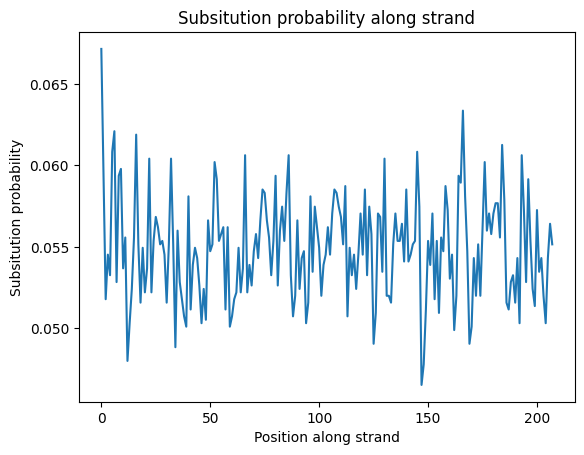

In [ ]:
plt.plot(along_length[0])
plt.title("Deletion probability along strand")
plt.xlabel("Position along strand")
plt.ylabel("Deletion probability")

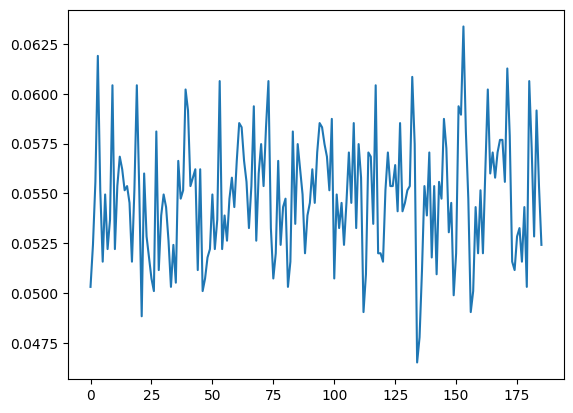

In [254]:
plt.plot(along_length[0][13:199])

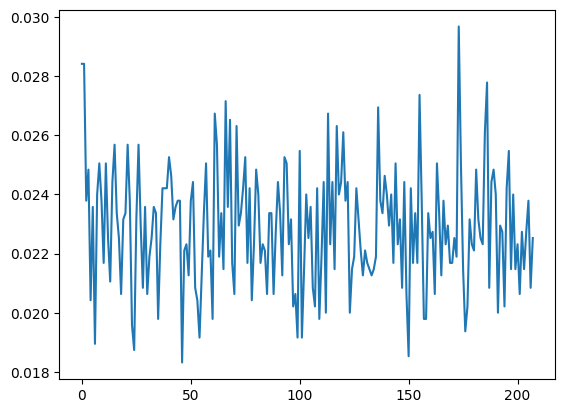

In [255]:
plt.plot(along_length[2])

Writing original strands to a fasta file for running Badread

In [172]:
from utils import create_fasta_file
import uuid 

ids = [str(uuid.uuid4()) for i in range(len(original_strands))]

create_fasta_file(ids, original_strands, output_filepath='jpeg_seq.fasta')

File saved as jpeg_seq.fasta


### Reconstruction via clustering (remove primers, cluster, align, checksum)

In [ ]:
# Removing adapters and filtering length
front_adapter = 'CATGAAGTGGAGTAGCGGCG'
reverse_adapter = 'GCGACCGATGCTCACTGATC'

rev_front = reverse_complement(reverse_adapter)
rev_back = reverse_complement(front_adapter)

cleaned_strand_pool = []
cleaned_strand_ids = []

for ind, i in enumerate(strand_pool):
    
    if front_adapter in i[:20]:
        if reverse_adapter in i[-21:]:
            cleaned_strand = i[20: -21]
            
            if len(cleaned_strand) > 200 and len(cleaned_strand) < 230:
                cleaned_strand_pool.append(cleaned_strand)
                cleaned_strand_ids.append(strand_ids[ind])
    if rev_front in i[:20]:
        if rev_back in i[-21:]:
            cleaned_strand = reverse_complement(i[20:-21])
            if len(cleaned_strand) > 200 and len(cleaned_strand) < 230:
                cleaned_strand_pool.append(cleaned_strand)
                cleaned_strand_ids.append(strand_ids[ind])

I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here
I enter here

In [32]:
len(cleaned_strand_pool)

16692

In [169]:
obj = Clustering(strand_pool=cleaned_strand_pool, reference_length=208, strand_pool_ids=strand_ids, front_adapter=front_adapter, reverse_adapter=reverse_adapter, n_reference_strands=800)

In [170]:
obj.run_pipeline(remove_adapters=False)

Filtering strands by length
0.18230659025787965 strands filtered out
Clustering strands
Total strands 6849


100%|██████████| 6849/6849 [00:20<00:00, 328.55it/s]


Number of clusters = 966
Clusters are sorted
Orientation fixed in the strand pool
Generating 1000 candidates


100%|██████████| 850/850 [01:07<00:00, 12.68it/s]


Evaluating candidates


0it [00:00, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [59]:
strand_pool[7]

'CATGAAGTGGAGTAGCGGCGCATGGAGTGGATAACTGCGGTAACTGATCCACCATGTCTCATAGGTCAACGTACTAGAGGGCTTACCTAAGGCGAACCTTAGCATTTATCAGAGTGAGCCGAGCATTGATTAGACCTATGAGACATGGTGGATCAGTTACCGCAGTTATCCCACTCCATGCGCCACTACTCCACTCATGA'

In [ ]:
front_adapter

'CATGAAGTGGAGTAGCGGCG'

In [92]:
df = pd.read_csv(r"C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\cat_FFDX_checksum.csv")

In [107]:
len(original_strands)

1031

In [98]:
check = CheckSum4(reference_length=204)

In [171]:
len(set(obj.candidates).intersection(set(original_strands)))

386

In [173]:
decoded_strands = check.decode(obj.candidates, n_reference_strands=1031, clustered_seqs=obj.clustered_seqs, n_guesses=5, guesses=True)

100%|██████████| 850/850 [00:00<00:00, 16185.77it/s]


394 direct checksum matches found
Making guesses


100%|██████████| 456/456 [02:09<00:00,  3.51it/s]

26 extra found after guessing
0.002380952380952381 were reversed
420 Valid checksum strands found


In [133]:
original_strands_ = [i[:-4] for i in original_strands]

In [135]:
len(set(decoded_strands).intersection(set(original_strands_)))

882

In [140]:
len(original_strands)

1031

In [145]:
create_fasta_file(ids=[str(uuid.uuid4()) for i in range(len(decoded_strands))], strands=decoded_strands, output_filepath=r"C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\1_Twist_decoded.fasta")

File saved as C:\Users\Parv\Doc\RA\Projects\sequencingData\JPEGDNA\1_Twist_decoded.fasta
